In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

**Data Loading, Exploration & Wrangling**

In [3]:
df = pd.read_csv('/content/Unemployment in India.csv')

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# View the number of Rows and columns


print(f'The dataset has {df.shape[0]} rows')
print(f'The dataset has {df.shape[1]} columns')

The dataset has 768 rows
The dataset has 7 columns


In [8]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [9]:
# Renaming the columns for easier access

df = df.rename(columns={'Region' : 'States', ' Date' : 'Date',' Frequency': 'Frequency' ,
                        ' Estimated Unemployment Rate (%)' : 'Est_Unemp_Rate', ' Estimated Employed' : 'Est_Emp',
                        ' Estimated Labour Participation Rate (%)' : 'Est_Labour_Rate'}).reset_index(drop = True)


# Rounding estimated employed column for a better visualizing

df['Est_Emp'] = round((df['Est_Emp']/1000000),2)

df.head(2)

,States,Date,Frequency,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,12.00,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11.76,42.05,Rural


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   States           740 non-null    object 
 1   Date             740 non-null    object 
 2   Frequency        740 non-null    object 
 3   Est_Unemp_Rate   740 non-null    float64
 4   Est_Emp          740 non-null    float64
 5   Est_Labour_Rate  740 non-null    float64
 6   Area             740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [11]:
# Checking the missing values
df.isnull().sum()

States             28
Date               28
Frequency          28
Est_Unemp_Rate     28
Est_Emp            28
Est_Labour_Rate    28
Area               28
dtype: int64

In [12]:
# Checking the percentage of missing values
round(df.isnull().sum()/df.shape[0]*100,2)

States             3.65
Date               3.65
Frequency          3.65
Est_Unemp_Rate     3.65
Est_Emp            3.65
Est_Labour_Rate    3.65
Area               3.65
dtype: float64

In [13]:
# Deleting the rows with missing values and  then checking the no of rows and columns

df.dropna(inplace = True)
df.shape

(740, 7)

In [14]:
# Changing the dtype of 'Date' column

df['Date'] = pd.to_datetime(df['Date'])

# Converting 'Area' columns to categorical data type

df['Area'] = df['Area'].astype('category')

# Dropping the 'Frequency' column

df = df.drop(['Frequency'],axis = 1)

In [16]:
# Creating new columns for year and month

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month



In [20]:
# Mapping integer month values to abbreviated month names

df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [22]:
df.head(4)

,States,Date,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate,Area,Year,Month,Month_Name
0,Andhra Pradesh,2019-05-31,3.65,12.00,43.24,Rural,2019,5,May
1,Andhra Pradesh,2019-06-30,3.05,11.76,42.05,Rural,2019,6,Jun
2,Andhra Pradesh,2019-07-31,3.75,12.09,43.50,Rural,2019,7,Jul
3,Andhra Pradesh,2019-08-31,3.32,12.29,43.97,Rural,2019,8,Aug


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   States           740 non-null    object        
 1   Date             740 non-null    datetime64[ns]
 2   Est_Unemp_Rate   740 non-null    float64       
 3   Est_Emp          740 non-null    float64       
 4   Est_Labour_Rate  740 non-null    float64       
 5   Area             740 non-null    category      
 6   Year             740 non-null    int32         
 7   Month            740 non-null    int32         
 8   Month_Name       740 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(3), int32(2), object(2)
memory usage: 47.1+ KB


**Exploratory Analysis & Visualization**

In [24]:
# Descriptive Statistics

df_stat = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(df_stat.describe(),2)

,Est_Unemp_Rate,Est_Emp,Est_Labour_Rate
count,740.00,740.00,740.00
mean,11.79,7.20,42.63
std,10.72,8.09,8.11
min,0.00,0.05,13.33
25%,4.66,1.19,38.06
50%,8.35,4.74,41.16
75%,15.89,11.28,45.50
max,76.74,45.78,72.57




*   Mean Unemployment Rate: 11.79%
*   Median Unemployment Rate: 8.35%
*   Standard Deviation of Unemployment Rate: 10.72%

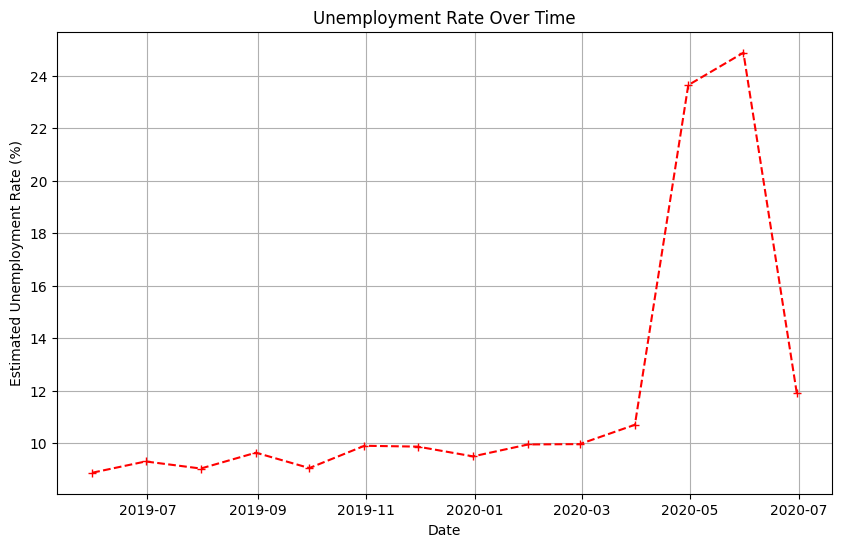

In [25]:
# Grouping the data by 'Date' and calculate the mean unemployment rate for each date

mean_unemployment_over_time = df.groupby('Date')['Est_Unemp_Rate'].mean()

# Create a line plot

plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='+', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()



*   The plot reveals periods of particularly high unemployment rates, exceeding 20%, in May and June of 2020.

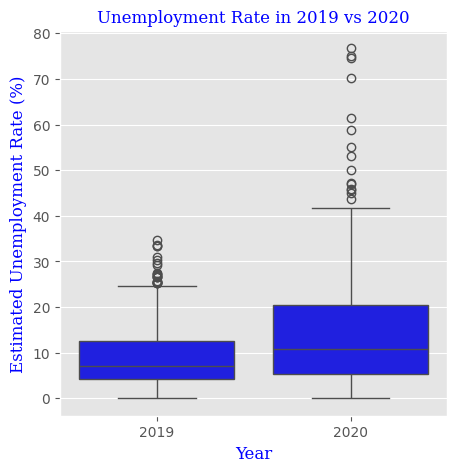

In [27]:
# Analysing the 'Estimated Unemployment Rate' column using Boxplot for years 2019 and 2020

plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.boxplot(y = df['Est_Unemp_Rate'], x = df['Year'], color ='blue')

font = {'family': 'serif', 'color': 'blue', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Unemployment Rate in 2019 vs 2020', fontdict=font)
plt.show()

*   Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020.

In [28]:
# Bar plot of average Unemployment Rate by State

df_unemp = df[['Est_Unemp_Rate', 'States']].groupby('States').mean().reset_index()
df_unemp = df_unemp.sort_values('Est_Unemp_Rate')
fig = px.bar(df_unemp, x='States', y='Est_Unemp_Rate', color='States',
             labels={'States' : 'States', 'Est_Unemp_Rate' : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each state', template='plotly_white')
fig.show()

Overall unemployment rate was high for
*   Tripura
*   Haryana
*   Jharkhand
*   Bihar

Overall Lowest unemployment rate was for
*   Meghalaya
*   Odisha
*   Assam
*   Uttarkhand


In [29]:
# Box plot of Unemployment Rate by State

fig = px.box(df, x='States', y='Est_Unemp_Rate', color='States',
             labels={'States' : 'States', 'Est_Unemp_Rate' : 'Unemployment Rate (%)'},
             title='Unemployment Rate Per States', template='plotly')

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

*   These box plots show extreme variablity in the unemployment rate for all the sates especially in one side (skewed).



In [30]:
# Sunburst chart showing unemployment rate in each area and state

fig = px.sunburst(df, path=['Area', 'States'], values='Est_Unemp_Rate',
                  title='Sunburst Plot of Estimated Unemployment Rate by States and Area',
                  height=650, template='ggplot2')
fig.show()

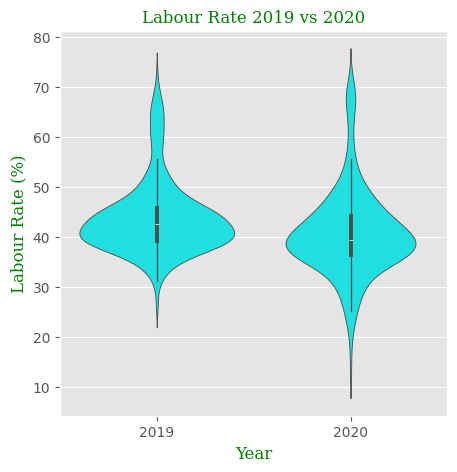

In [32]:
# Analysing the 'Labour Rate' column with Violin Plot

plt.figure(figsize=(5,5))
plt.style.use('ggplot')
sns.violinplot(y = df['Est_Labour_Rate'], x = df['Year'], color ='cyan')

font = {'family': 'serif', 'color': 'green', 'weight': 'normal', 'size': 12}
plt.xlabel('Year', fontdict=font)
plt.ylabel('Labour Rate (%)', fontdict=font)
plt.title('Labour Rate 2019 vs 2020', fontdict=font)
plt.show()

*   Labour Rate shows high variablity in 2020 due to the lockdown in wake of Covid 19.


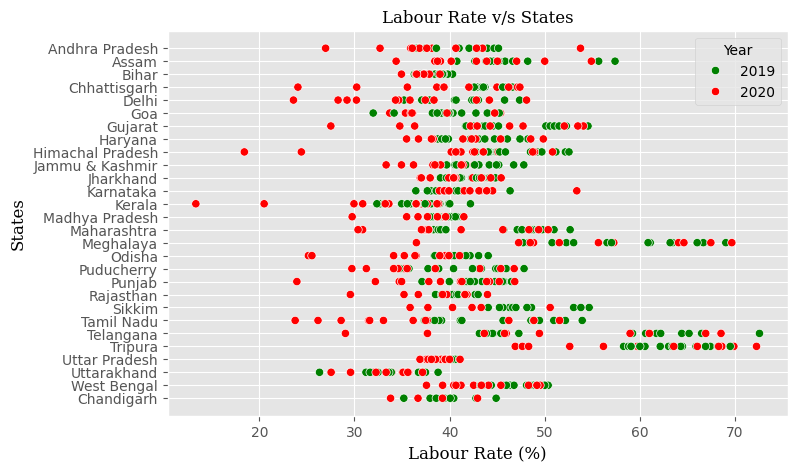

In [33]:
# Scatter plot of labour Rate by State

plt.figure(figsize=(8,5))
plt.style.use('ggplot')
sns.scatterplot(x = df['Est_Labour_Rate'], y = df['States'], hue = df['Year'], palette =['green','red'])

font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 12}
plt.xlabel('Labour Rate (%)', fontdict=font)
plt.ylabel('States', fontdict=font)
plt.title('Labour Rate v/s States', fontdict=font)
plt.show()

*   The Labour Rate is shwoing decreasing tendecy during 2020 for all the states.


In [34]:
# Bar plot of average Labour Rate by States

df_lr = df[['Est_Labour_Rate', 'States']].groupby('States').mean().reset_index()
df_lr = df_lr.sort_values('Est_Labour_Rate')
fig = px.bar(df_lr, x='States', y='Est_Labour_Rate', color='States',
             labels={'States' : 'States', 'Est_Labour_Rate' : 'Labour Rate (%)'},
             title='Average Labour Rate in each States', template='gridon')
fig.show()

In [35]:
# Analysing the Area column

df.Area.value_counts(normalize = True)*100

Area
Urban    51.486486
Rural    48.513514
Name: proportion, dtype: float64

In [36]:
# Descriptive Statistics based on Area

area_stats = df.groupby(['Area'])[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate']]
round(area_stats.describe(),2).T

Area                    Rural   Urban
Est_Unemp_Rate  count  359.00  381.00
                mean    10.32   13.17
                std     10.04   11.17
                min      0.00    0.00
                25%      3.79    5.82
                50%      6.76    9.97
                75%     13.76   18.04
                max     74.51   76.74
Est_Emp         count  359.00  381.00
                mean    10.19    4.39
                std      9.85    4.41
                min      0.05    0.06
                25%      2.02    0.78
                50%      7.51    2.82
                75%     14.76    5.76
                max     45.78   17.49
Est_Labour_Rate count  359.00  381.00
                mean    44.46   40.90
                std      8.85    6.92
                min     13.33   20.51
                25%     39.05   37.42
                50%     42.56   40.21
                75%     48.15   44.18
                max     72.57   72.26


*  The Mean and Median Unemployment rate were higher for Urban areas


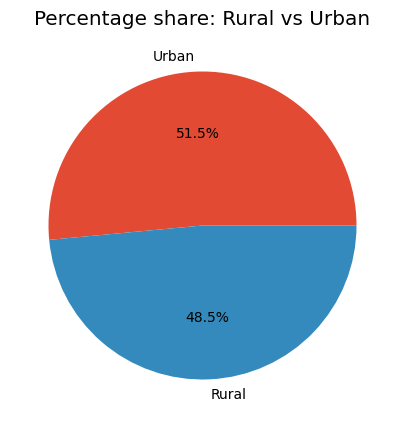

In [37]:
# Pie chart for Rural and Urban count

plt.figure(figsize=[6, 5])
plt.pie(df['Area'].value_counts(), labels=df['Area'].value_counts().index, autopct='%1.1f%%')
plt.title('Percentage share: Rural vs Urban')
plt.show()

*   This shows the dataset was taken almost equally from both urban and rural areas

In [38]:
# Average Unemployment Rate in each Area

df_ar_unemp = df[['Est_Unemp_Rate', 'Area']].groupby('Area').mean().reset_index()
df_ar_unemp = df_ar_unemp.sort_values('Est_Unemp_Rate')
fig = px.bar(df_ar_unemp, x='Area', y='Est_Unemp_Rate', color='Area',
             labels={'Area' : 'Area', 'Est_Unemp_Rate' : 'Average Unemployment Rate (%)'},
             title='Average Unemployment Rate in each Area', template='gridon')
fig.show()

*   The Mean Unemployment Rate was higher for Urban areas

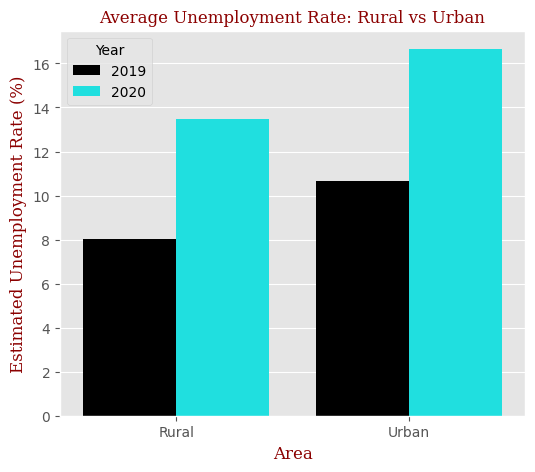

In [39]:
# Mean Unemploymnet rate in each area for 2019 vs 2020

plt.figure(figsize = [6,5])
palette ={2019: "black", 2020: "cyan"}
sns.barplot(data = df, x = 'Area', y="Est_Unemp_Rate", estimator='mean', hue='Year', errorbar=None, palette=palette)

font = {'family': 'serif', 'color': 'darkred', 'weight': 'normal', 'size': 12}
plt.xlabel('Area', fontdict=font)
plt.ylabel('Estimated Unemployment Rate (%)', fontdict=font)
plt.title('Average Unemployment Rate: Rural vs Urban', fontdict=font)
plt.show()

*   Both Rural and Urban areas had higher unemployment rate in 2020 than 2019.
*   Urban areas had higher unemployment rate than rural areas.


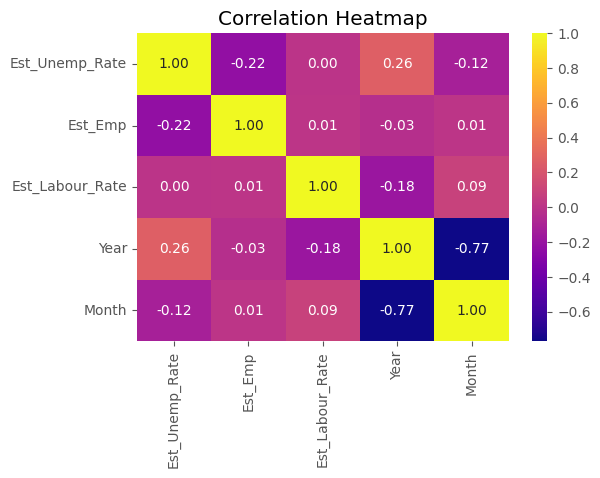

In [40]:
# Calculate correlation matrix

df_htmp = df[['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate', 'Year', 'Month']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(df_htmp, annot=True, cmap='plasma', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

*   When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.
*   The effect of year on unemployment in this dataset is clear from the correlation coeeficient.


In [41]:
# Scatter matrix cosidering the employed and unemployed rates

fig = px.scatter_matrix(df, template='plotly',
                        dimensions=['Est_Unemp_Rate', 'Est_Emp', 'Est_Labour_Rate'],
                        color='States')
fig.show()

**Lockdown Impact**

In [42]:
# Creating new dataframes for before and after lockdown period during the same months

before_lockdown = df[(df['Month'] >= 4) & (df['Month'] <= 6) & (df['Year'] ==2019)]
after_lockdown = df[(df['Month'] >= 4) & (df['Month'] <= 6) & (df['Year'] ==2020)]

In [43]:
# Calculating the mean unemployment rate before lockdown by state

bf_lockdown= before_lockdown.groupby('States')['Est_Unemp_Rate'].mean().reset_index()

# Calculating the mean unemployment rate after lockdown by state

af_lockdown = after_lockdown.groupby('States')['Est_Unemp_Rate'].mean().reset_index()

# Combining the mean unemployment rates before and after lockdown by state

combined_df = pd.merge(bf_lockdown, af_lockdown, on='States')

combined_df.columns=['States','Unemployment Rate Before Lockdown','Unemployment Rate After Lockdown']
combined_df.head()

,States,Unemployment Rate Before Lockdown,Unemployment Rate After Lockdown
0,Andhra Pradesh,4.1475,15.778333
1,Assam,6.7825,6.388000
2,Bihar,13.1650,36.988333
3,Chandigarh,15.3750,7.220000
4,Chhattisgarh,9.5300,14.846667


In [44]:
# Percentage change in unemployment rate

combined_df['Rate Change in Unemployment'] = round(combined_df['Unemployment Rate After Lockdown'] - combined_df['Unemployment Rate Before Lockdown']/combined_df['Unemployment Rate Before Lockdown'],2)
percent_change_df = combined_df.sort_values('Rate Change in Unemployment')

In [45]:
# Percentage change in unemployment after lockdown

fig = px.bar(percent_change_df, x='States',y='Rate Change in Unemployment',color='Rate Change in Unemployment',
            labels={'States' : 'States', 'Rate Change in Unemployment' : '% Change in Unemployment'},
            title='% Change in Unemployment Rate from 2019 to 2020 for Apr-Jun ',
            color_continuous_scale = 'viridis', width=900, height=500)
fig.show()

Most impacted States/Union Territories
*   Puducherry
*   Jharkhad
*   Haryana
*   Tamil Nadu

**Observations**


**Unemployment Rate**

*   Mean Unemployment Rate: 11.79%
*   Median Unemployment Rate: 8.35%
*   Standard Deviation of Unemployment Rate: 10.72%
*   Due to the lockdown imposed in the wake of Covid-19 pandemic, there was sudden increase in the Unemployment Rate in 2020.
*   There were periods of particularly high unemployment rates, exceeding 20%, in May and June of 2020.
*   Overall unemployment rate was high for Tripura, Haryana, Jharkhand and Bihar
*   Overall Lowest unemployment rate was for Mehghalaya, Odisha, Assam and uttrakhand

*   There was extreme variablity in the unemployment rate for all the sates especially in one side (skewed).

**Labour Rate**

*   Labour Rate shows high variablity in 2020 due to the lockdown in wake of Covid 19.
*   The Labour Rate is shwoing decreasing tendecy during 2020 for all the states.

**Rural Vs Urban**

*   The Mean and Median Unemployment rate were higher for Urban areas
*   The dataset was taken almost equally from both urban and rural areas
*   The Mean Unemployment Rate was higher for Urban areas
*   Both Rural and Urban areas had higher unemployment rate in 2020 than 2019.
*   Urban areas had higher unemployment rate than rural areas.

**Miscellaneous**

*   When unemployment rates go up, the number of employed people tends to go down, showing an opposite relationship.
*   The effect of year on unemployment in this dataset is clear from the correlation coeeficient
*   Most impacted States/Union Territories Puducherry, Jharkhand, Bihar Haryana and Tamil Nadu